<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import pandas as pd

# Instantiate df with amazon reviews from first module
df = pd.read_csv('./data/Datafinitii_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.shape

(28332, 24)

In [2]:
# Instantiate sample of df to test be4 running full through model 
df2 = df.sample(5000)
df2.shape

(5000, 24)

In [3]:
pd.set_option('display.max_colwidth', -1)
df.head(5)

E:\Anaconda\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51DfBuqy4qL._SL1189_.jpg,https://images-na.ssl-images-amazon.com/images/I/51TshsEJTIL.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%25252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51g3uIwzOIL._SL1050_.jpg,http://ecx.images-amazon.com/images/I/613LUdOc1eL._SS40_.jpg","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9P0O/,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...,Byger yang,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-36-Pack/dp/B00LH3DMUO/,http://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-36-Pack/dp/B00LH3DMUO"
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51DfBuqy4qL._SL1189_.jpg,https://images-na.ssl-images-amazon.com/images/I/51TshsEJTIL.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%25252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51g3uIwzOIL._SL1050_.jpg,http://ecx.images-amazon.com/images/I/613LUdOc1eL._SS40_.jpg","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,4,https://www.amazon.c

In [4]:
# Visualize wording for any html, special characters, etc. 
df['reviews.text']

0        I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.                                                                                                                                                                                  
1        Bulk is always the less expensive way to go for products like these                                                                                                                                                                                                                                                          
2        Well they are not Duracell but for the price i am happy.                                                                                                                                                                                                                                                                     
3        Seem to wo

---
Tokenization
---
---

In [5]:
# Import spacy to get some tokens 
import spacy

nlp = spacy.load("en_core_web_lg")

In [6]:
## Using Lemmas as our tokens

tokens = []

for doc in nlp.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc:
        if ((token.is_stop != True) and (token.pos_ != 'PRON')) and (token.is_punct !=True):
            doc_tokens.append(token.lemma_.strip())
            
    tokens.append(doc_tokens)

In [7]:
# Sanity check
len(tokens) == df.shape[0]

True

In [8]:
# Check first list of tokens
tokens[0]

['order',
 '3',
 'item',
 'bad',
 'quality',
 'miss',
 'backup',
 'spring',
 'pc',
 'aluminum',
 'battery',
 'work']

---
Gensim LDA Topic Modeling
---
---

In [9]:
# Import gensim to prep our model 
import gensim

from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

# Create a corpora dictionary (a list of a list of tokens)
id2word = corpora.Dictionary(tokens)

In [10]:
# Sanity check
len(id2word.keys())

9705

In [11]:
id2word.filter_extremes(no_below=5, no_above=.95)

In [12]:
# Sanity check, cont'd...
len(id2word.keys())

3082

In [13]:
# Construct the corpora and process it
corpora = [id2word.doc2bow(doc) for doc in tokens]
lda = LdaMulticore(corpus=corpora,
                  id2word=id2word,
                  num_topics=15, 
                  passes=50)

# Visualize results
lda.print_topics()

[(0,
  '0.086*"tablet" + 0.061*"great" + 0.047*"need" + 0.020*"app" + 0.017*"memory" + 0.017*"card" + 0.016*"good" + 0.015*"storage" + 0.015*"lot" + 0.012*"love"'),
 (1,
  '0.042*"work" + 0.037*"device" + 0.027*"problem" + 0.020*"app" + 0.018*"Amazon" + 0.017*"home" + 0.015*"try" + 0.014*"return" + 0.013*"issue" + 0.013*"connect"'),
 (2,
  '0.108*"battery" + 0.020*"Amazon" + 0.018*"buy" + 0.016*"use" + 0.014*"remote" + 0.013*"box" + 0.012*"pack" + 0.011*"need" + 0.010*"come" + 0.010*"package"'),
 (3,
  '0.139*"easy" + 0.096*"use" + 0.044*"size" + 0.038*"tablet" + 0.033*"great" + 0.026*"perfect" + 0.024*"love" + 0.024*"nice" + 0.019*"screen" + 0.018*"book"'),
 (4,
  '0.047*"charge" + 0.022*"tablet" + 0.021*"user" + 0.018*"kid" + 0.017*"friendly" + 0.015*"buy" + 0.014*"hour" + 0.013*"break" + 0.012*"charger" + 0.011*"good"'),
 (5,
  '0.128*"love" + 0.075*"buy" + 0.050*"old" + 0.042*"year" + 0.039*"gift" + 0.035*"daughter" + 0.032*"tablet" + 0.031*"purchase" + 0.030*"Christmas" + 0.023*"g

In [14]:
# Lets make this a little more viewer-friendly with some borrowed code from class
import re
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
tablet great need app memory

------ Topic 1 ------
work device problem app Amazon

------ Topic 2 ------
battery Amazon buy use remote

------ Topic 3 ------
easy use size tablet great

------ Topic 4 ------
charge tablet user kid friendly

------ Topic 5 ------
love buy old year gift

------ Topic 6 ------
battery power price high bad

------ Topic 7 ------
tablet Amazon Fire app $

------ Topic 8 ------
great good price product value

------ Topic 9 ------
battery long brand good work

------ Topic 10 ------
game tablet watch book movie

------ Topic 11 ------
work sound fine speaker Alexa

------ Topic 12 ------
Kindle kindle read book light

------ Topic 13 ------
expect screen like time ok

------ Topic 14 ------
kid tablet love child great



---
Interpret LDA Results
---
---

In [15]:
# Part 1: Topic Distance Visualization
"""
Tells us if the topics are distinct, and what terms are most import important to the topic distribution.
"""

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [16]:
pyLDAvis.gensim.prepare(lda,corpora,id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.177263 -0.110265  1       1        11.874027
9      0.286130  0.099643  2       1        9.002616 
7     -0.031772 -0.007860  3       1        8.437428 
14    -0.191099  0.094943  4       1        8.416549 
5     -0.187353  0.050689  5       1        8.358413 
8      0.225162  0.289926  6       1        7.164217 
12    -0.098616 -0.113298  7       1        6.689332 
10    -0.159864  0.071394  8       1        6.625452 
3     -0.185729  0.081156  9       1        6.418604 
4     -0.056165 -0.120180  10      1        5.209456 
0     -0.084293  0.143113  11      1        5.055993 
1      0.035915 -0.226258  12      1        4.659321 
6      0.209190 -0.059295  13      1        4.322816 
13     0.028338 -0.147923  14      1        3.943126 
11     0.032895 -0.045784  15      1        3.822644 , topic_info=         Term         Freq        Total Category  logprob  loglift
3    battery   9670.000000  9670.000000  Default  30.0000  30.0000
21   great     8955.000000  8955.000000  Default  29.0000  29.0000
18   price     5037.000000  5037.000000  Default  28.0000  28.0000
31   easy      3186.000000  3186.000000  Default  27.0000  27.0000
84   love      6002.000000  6002.000000  Default  26.0000  26.0000
..    ...              ...          ...      ...      ...      ...
84   love      91.503349    6002.909668  Topic15 -4.8869  -0.9194 
89   want      75.547676    1271.387207  Topic15 -5.0785   0.4411 
99   thing     72.344193    993.365417   Topic15 -5.1219   0.6446 
215  device    73.290306    1394.929199  Topic15 -5.1089   0.3181 
37   purchase  71.450562    2509.694336  Topic15 -5.1343  -0.2947 

[1055 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2394  3      0.931415  $     
2394  7      0.059501  $     
2394  11     0.006865  $     
1904  13     0.889053  1/3   
194   1      0.258934  2     
...   ..          ...  ...   
2659  15     0.938028  yrs   
1022  13     0.915664  yup   
2306  7      0.914794  zipper
1319  10     0.869073  zone  
2997  15     0.893214  ©     

[2738 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 8, 15, 6, 9, 13, 11, 4, 5, 1, 2, 7, 14, 12])

In [17]:
# Part 2: What are the documents about? 
# Eqv. to a `.predict` statement in sklearn
# Scoring the topic distribution of a single document

lda[corpora[0]]

[(1, 0.4887827), (2, 0.4389778)]

In [18]:
# Instantiate LDA result info into a df 
distro = [lda[d] for d in corpora]

# Filter the info
def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

# Convert to df
doc_topics = pd.DataFrame.from_records(new_distro)
doc_topics.columns = topics

# Visualize df
doc_topics.head()

,tablet great need app memory,work device problem app Amazon,battery Amazon buy use remote,easy use size tablet great,charge tablet user kid friendly,love buy old year gift,battery power price high bad,tablet Amazon Fire app $,great good price product value,battery long brand good work,game tablet watch book movie,work sound fine speaker Alexa,Kindle kindle read book light,expect screen like time ok,kid tablet love child great
0,0.000000,0.539063,0.236703,0.000000,0.000000,0.000000,0.157553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.011112,0.011112,0.011112,0.011112,0.011112,0.011112,0.011112,0.011112,0.011112,0.451125,0.011112,0.011112,0.011112,0.404424,0.011112
2,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.766662,0.016667,0.016667,0.016667,0.016667,0.016667
3,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.844444,0.011111,0.011111,0.011111,0.011111,0.011111
4,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.844444,0.011111,0.011111,0.011111,0.011111,0.011111


In [19]:
# Find the primary topics
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)
# Find count of these primary topics 
doc_topics['primary_topic'].value_counts()

battery long brand good work       4146
great good price product value     4044
love buy old year gift             2989
battery Amazon buy use remote      2644
kid tablet love child great        2423
easy use size tablet great         1900
tablet Amazon Fire app $           1628
game tablet watch book movie       1521
tablet great need app memory       1443
Kindle kindle read book light      1425
work sound fine speaker Alexa      919 
expect screen like time ok         895 
charge tablet user kid friendly    882 
battery power price high bad       829 
work device problem app Amazon     644 
Name: primary_topic, dtype: int64

---
Selecting the Number of Topics
---
---

In [20]:
# Find coherence values using code borrowed from class
# Should allow us to graph coherence and analyze ideal amount of topics
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute u_mass coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [21]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpora,
                                                        start=3, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=1)

In [22]:
# Instantiate a df with coherence values
topic_coherence = pd.DataFrame.from_records(coherence_values)
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,3,-2.328458
1,0,5,-2.329842
2,0,7,-2.302241
3,0,9,-2.377646
4,0,11,-2.394657


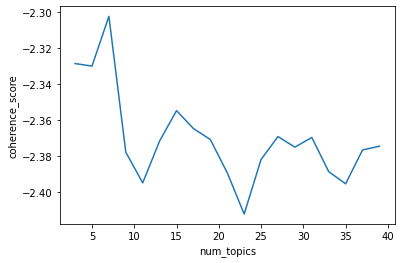

In [23]:
# Visualize coherence results
import seaborn as sns
 
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

---
Findings
---
---

* Topics 0, 1, and 12 are all on the right half of the Intertopic Distance Map and have a high relation to the word 'battery'
* Topics 1 and 5 are both in the top-right quadrant and both are seperated with no close groupings
* All of the topics in the bottom-left quadrant relate to tablets/kindle
* Topics 3, 4, 7, and 8 are heavily grouped; funnily enough again relating to tablets, but in the top-left quadrant this time
* The topic coherence fluctuates between -2.3 and -2.4, with peak useability around 16 topics and its lowest around 24. 
    

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling